# Assignment 2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

**2a**

16-17 vaccine efficacy is 1.0000
Two-sided 95% confidence interval of VE is [1.0000, 1.0000]
One-sided 95% confidence interval of VE is [1.0000, 1]


C:\Users\samyakj\AppData\Local\Temp\ipykernel_8696\1288548204.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(VEs, shade=True)


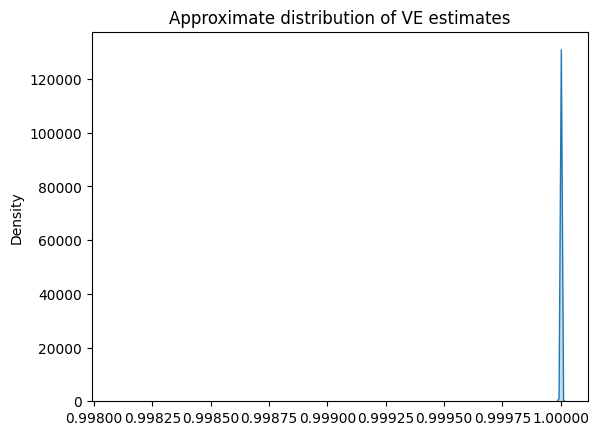

In [2]:
# ***Age group 16-17***

NV =  58 # number of vaccinated
NU =  61 # number of unvaccinated
RV = 0 / NV # average outcome for the vaccinated
RU = 1 / NU # average outcome for the unvaccinated
VE = (RU - RV)/RU; # vaccine efficacy


print(f"16-17 vaccine efficacy is {VE:.4f}")
var_rv = RV * (1 - RV) / NV
var_ru = RU * (1 - RU) / NU

np.random.seed(123)
B = 10000
RVs = RV  + np.random.normal(0, 1, B) * np.sqrt(var_rv) + 1e-10
RUs = RU  + np.random.normal(0, 1, B) * np.sqrt(var_ru) + 1e-10
VEs = (RUs - RVs) / RUs

CI_VE = np.quantile(VEs, (.025, .975))

print(f"Two-sided 95% confidence interval of VE is [{CI_VE[0]:.4f}, {CI_VE[1]:.4f}]")

CI_VE = np.quantile(VEs, (.05))

print(f"One-sided 95% confidence interval of VE is [{CI_VE:.4f}, 1]")


sns.kdeplot(VEs, shade=True)
plt.title("Approximate distribution of VE estimates")
plt.show()

C:\Users\samyakj\AppData\Local\Temp\ipykernel_8696\945173261.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(VEs, shade=True)


18-64 vaccine efficacy is 0.9459
Two-sided 95% confidence interval of VE is [0.9056, 0.9830]
One-sided 95% confidence interval of VE is [0.9127, 1]


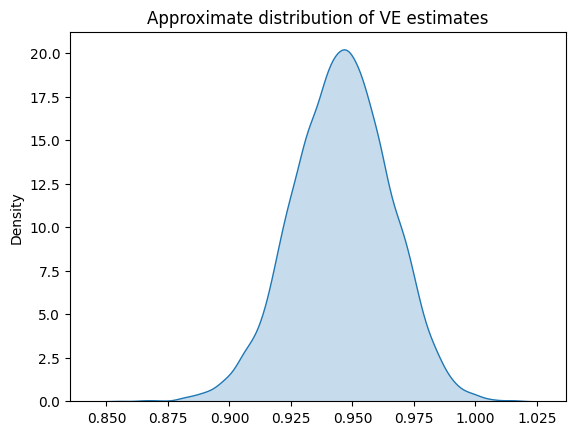

In [3]:
# ***Age group 18-64***

NV =  14443 # number of vaccinated
NU =  14566 # number of unvaccinated
RV = 8 / NV # average outcome for the vaccinated
RU = 149 / NU # average outcome for the unvaccinated
VE = (RU - RV)/RU; # vaccine efficacy


print(f"18-64 vaccine efficacy is {VE:.4f}")
var_rv = RV * (1 - RV) / NV
var_ru = RU * (1 - RU) / NU

np.random.seed(123)
B = 10000
RVs = RV  + np.random.normal(0, 1, B) * np.sqrt(var_rv) + 1e-10
RUs = RU  + np.random.normal(0, 1, B) * np.sqrt(var_ru) + 1e-10
VEs = (RUs - RVs) / RUs

CI_VE = np.quantile(VEs, (.025, .975))

print(f"Two-sided 95% confidence interval of VE is [{CI_VE[0]:.4f}, {CI_VE[1]:.4f}]")

CI_VE = np.quantile(VEs, (.05))

print(f"One-sided 95% confidence interval of VE is [{CI_VE:.4f}, 1]")


sns.kdeplot(VEs, shade=True)
plt.title("Approximate distribution of VE estimates")
plt.show()

The estimated vaccine efficacies are the same as the CDC's estimates for both age groups. 

**2b**

Let $\theta_0 = RU$ and $\theta_1 = RV$. The vaccine efficacy is: 

$VE(\theta_0, \theta_1) = \frac{\theta_1 - \theta_0}{\theta_0}$ 

Using plug-in estimates, $\hat{VE}(\hat{\theta_0}, \hat{\theta_1}) = \frac{\hat{\theta_1} - \hat{\theta_0}}{\hat{\theta_0}} = \frac{\hat{\theta_1}}{\hat{\theta_0}} - 1$ 

$\nabla \hat{VE} = [\frac{-\hat{\theta_1}}{\hat{\theta_0^2}}, \frac{1}{\hat{\theta_0}}]$

Using the delta method:

$\sqrt{(n)} (\hat{VE} - VE) \rightarrow N(0, [\frac{-\theta_1}{\theta_0^2}, \frac{1}{\theta_0}]' V [\frac{-\theta_1}{\theta_0^2}, \frac{1}{\theta_0}]$, where V is the variance matrix of $[\theta_0, \theta_1]$. 

So, $\sqrt{(n)} (\hat{VE} - VE) \rightarrow N(0, \frac{\theta_1^2 V_{11}}{\theta_0^4} + \frac{V_{22}}{\theta_0^2})$.

$V_{11} = var(RU) = 8.188 * 10^{-10}$, $V_{22} = var(RV) = 2.838 * 10^{-9}$, $\hat{\theta_0} = 0.000571$, $\hat{\theta_1} = 0.000164$ (for overall population, from python-rct-vaccines notebook)

$var(\hat{VE}) = 0.00323$

$SE(\hat{VE}) = \sqrt{0.00323} = 0.05680$

$CI = [0.7124 - 1.96 * 0.05680, 0.7124 + 1.96 * 0.05680] = [0.601072, 0.823728]$
